## Introduction:
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

## Goal:
For this project we will be cleaning and exploring the dataset in Jupyter notebook

### Data Dictionary:
The dataset includes several columns. Following are the most suited to our needs.

|Features |Descriptions|
|:--------|:-----------|
|RespondentID | An anonymized ID for the respondent (person taking the survey)|
|Gender | The respondent's gender|
|Age | The respondent's age|
|Household Income | The respondent's income|
|Education | The respondent's education level|
|Location (Census Region) | The respondent's location|
|Have you seen any of the 6 films in the Star Wars franchise? | Has a Yes or No response|
|Do you consider yourself to be a fan of the Star Wars film franchise? | Has a Yes or No response|

### Resources:
https://github.com/fivethirtyeight/data/tree/master/star-wars-survey




## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Use ISO-8859-1 encoding
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## Exploring datset

In [3]:
star_wars.shape

(1187, 38)

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
# Features of star_wars
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
# We need to remove any rows where RespondentID is NaN.
star_wars['RespondentID'] = star_wars['RespondentID'].notnull()

In [7]:
star_wars['RespondentID'].isnull().sum()

0

## Data Cleaning
### Lets convert the columns given below into boolean ones
- *'Have you seen any of the 6 films in the Star Wars franchise?'*
- *'Do you consider yourself to be a fan of the Star Wars film' franchise?*

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
series_to_bool_map = {'Yes': True, 'No': False}

In [11]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(series_to_bool_map)

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].fillna(np.nan)

In [13]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [14]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [15]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(series_to_bool_map)

In [16]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].fillna(np.nan)

In [17]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [18]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,NaN,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [19]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [20]:
# Lets rename the columns names with lenghty and absurd to more sensical ones
rename_dict = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_ep1',
              'Unnamed: 4': 'seen_ep2', 'Unnamed: 5': 'seen_ep3', 'Unnamed: 6':'seen_ep4', 'Unnamed: 7': 'seen_ep5',
              'Unnamed: 8': 'seen_ep6'}
star_wars.rename(rename_dict, axis=1, inplace=True)

In [21]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,NaN,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


### Lets also replace the inputs with boolean ones within these renamed columns


In [22]:
# lets be assured of any spelling inconsistencies within these cols
col_to_work = [3,4,5,6,7,8]
for col in col_to_work:
    print(star_wars.columns[col])
    print(star_wars[star_wars.columns[col]].value_counts(dropna=False))
    print('\n')

seen_ep1
Star Wars: Episode I  The Phantom Menace    674
NaN                                         513
Name: seen_ep1, dtype: int64


seen_ep2
NaN                                            615
Star Wars: Episode II  Attack of the Clones    572
Name: seen_ep2, dtype: int64


seen_ep3
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    551
Name: seen_ep3, dtype: int64


seen_ep4
Star Wars: Episode IV  A New Hope    608
NaN                                  579
Name: seen_ep4, dtype: int64


seen_ep5
Star Wars: Episode V The Empire Strikes Back    759
NaN                                             428
Name: seen_ep5, dtype: int64


seen_ep6
Star Wars: Episode VI Return of the Jedi    739
NaN                                         448
Name: seen_ep6, dtype: int64




There are no spelling inconsistencies found

In [23]:
mark_true_dict = {'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False}

In [24]:
for col in col_to_work:
    worked = star_wars[star_wars.columns[col]].map(mark_true_dict)
    star_wars[star_wars.columns[col]] = worked
    print(star_wars[star_wars.columns[col]].value_counts(dropna=False))

True     674
False    513
Name: seen_ep1, dtype: int64
False    615
True     572
Name: seen_ep2, dtype: int64
False    636
True     551
Name: seen_ep3, dtype: int64
True     608
False    579
Name: seen_ep4, dtype: int64
True     759
False    428
Name: seen_ep5, dtype: int64
True     739
False    448
Name: seen_ep6, dtype: int64


### Lets move on to Rating columns
We need to rename them to more intuitive names as well as change their data type

In [25]:
col_to_work2 = [9,10,11,12,13,14]
for col in col_to_work2:
    print(star_wars.columns[col])
    print(star_wars[star_wars.columns[col]].value_counts(dropna=False))
    print('\n')

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
NaN                                         351
4                                           237
6                                           168
3                                           130
1                                           129
5                                           100
2                                            71
Star Wars: Episode I  The Phantom Menace      1
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64


Unnamed: 10
NaN                                            350
5                                              300
4                                              183
2                                              116
3                                              103
6                                          

In [26]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].drop(0, axis=0)

In [27]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


In [28]:
rename_dict2 = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_ep1',
    'Unnamed: 10': 'ranking_ep2',
    'Unnamed: 11': 'ranking_ep3',
    'Unnamed: 12': 'ranking_ep4',
    'Unnamed: 13': 'ranking_ep5',
    'Unnamed: 14': 'ranking_ep6',
}

star_wars.rename(rename_dict2, axis=1, inplace=True)
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4',
       'ranking_ep5', 'ranking_ep6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
    

### Finding out more about ranking 
Remember: A lower ranking is better!

In [29]:
ranking_cols = ['ranking_ep1','ranking_ep2','ranking_ep3',
               'ranking_ep4','ranking_ep5','ranking_ep6']

for col in ranking_cols:
    ranking_mean = star_wars[col].mean()
    print('Column name: {} has an average ranking of {:.3f}'.format(col, ranking_mean))
   

Column name: ranking_ep1 has an average ranking of 3.733
Column name: ranking_ep2 has an average ranking of 4.087
Column name: ranking_ep3 has an average ranking of 4.341
Column name: ranking_ep4 has an average ranking of 3.273
Column name: ranking_ep5 has an average ranking of 2.513
Column name: ranking_ep6 has an average ranking of 3.048


Text(0, 0.5, 'Rankings')

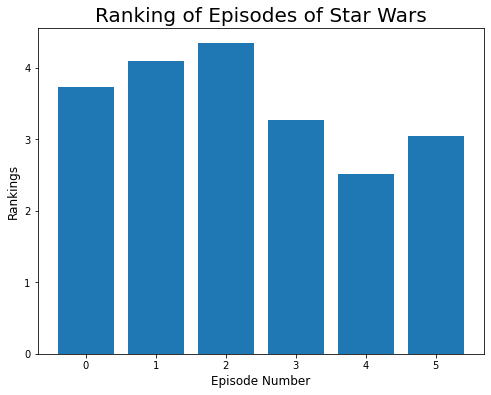

In [30]:
plt.figure(figsize=(8,6))
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title('Ranking of Episodes of Star Wars', fontsize=20)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Rankings', fontsize=12)

Given that a lower ranking is better, **Star Wars: Episode IV A New Hope** ranked top

## Lets see how many people have seen each movie

Text(0, 0.5, 'Number of Viewers')

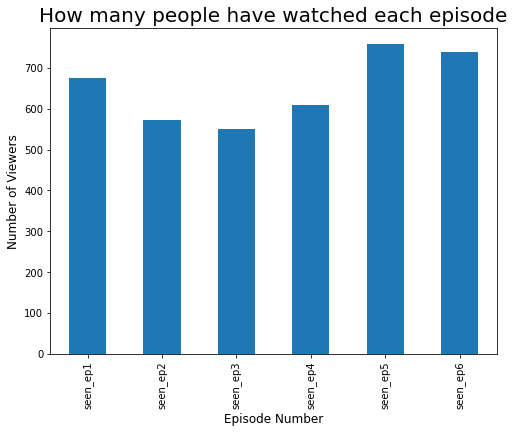

In [31]:
plt.figure(figsize=(8,6))
seen_sum = star_wars.loc[:,'seen_ep1':'seen_ep6'].sum()
seen_sum.plot.bar()
plt.title('How many people have watched each episode', fontsize=20)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Number of Viewers', fontsize=12)


- **Star Wars: Episode V The Empire Strikes Back**, is the most watched movie in the series, and it is also the highest rated based on the mean rankings. 
- Whereas the **Star Wars: Episode III Revenge of the Sith** was the least watched among all the movies
    

## Splitting the dataset for each Gender

In [32]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

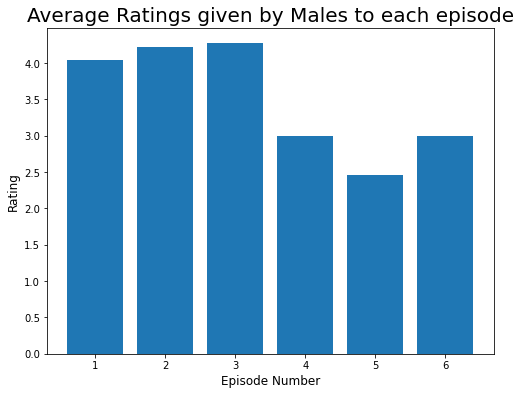

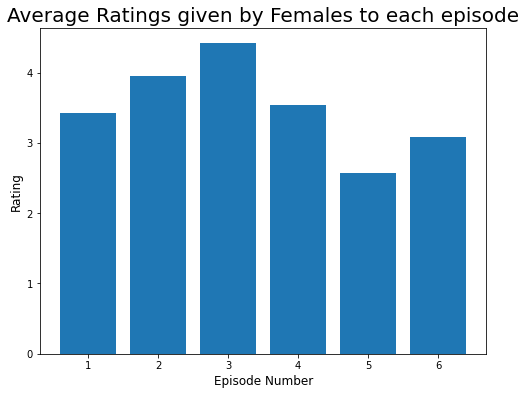

In [33]:
plt.figure(figsize=(8,6))
plt.bar(range(1,7), males[males.columns[9:15]].mean())
plt.title('Average Ratings given by Males to each episode',fontsize=20)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.bar(range(1,7), females[females.columns[9:15]].mean())
plt.title('Average Ratings given by Females to each episode', fontsize=20)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()


- We can see that Males and Females segeratedly liked **Star Wars: Episode V The Empire Strikes Back** the most and ranked it on the top. 


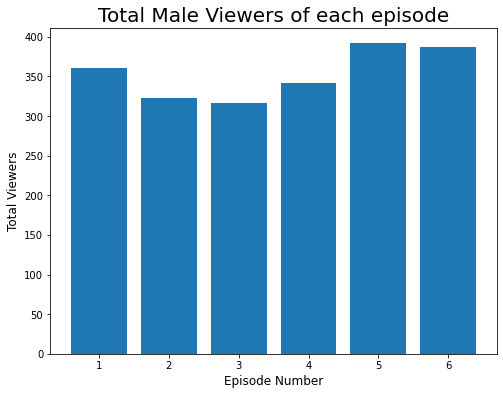

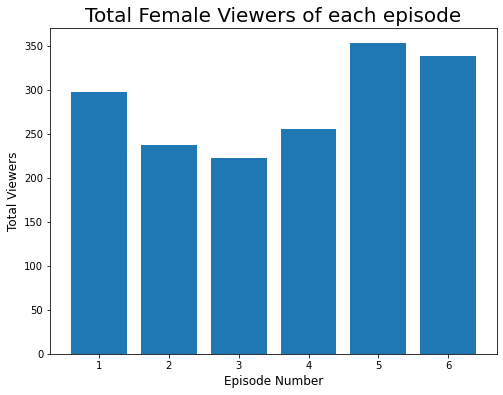

In [34]:
# For total views, we will calculate the sum rather than the mean
plt.figure(figsize=(8,6))
plt.bar(range(1,7), males[males.columns[3:9]].sum())
plt.title('Total Male Viewers of each episode', fontsize=20)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Total Viewers', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
plt.bar(range(1,7), females[females.columns[3:9]].sum())
plt.title('Total Female Viewers of each episode', fontsize=20)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Total Viewers', fontsize=12)
plt.show()

- **Star Wars: Episode V The Empire Strikes Back** also managed to get the most views by males as well as females

## Breaking down the data on Educational Basis

In [35]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Response                              1
Name: Education, dtype: int64

In [36]:
# To display the induviduals correctly who do not have educational credentials 
treat_nan = {np.nan:'Unknown'}
star_wars['Education'] = star_wars['Education'].rename(treat_nan)
star_wars[star_wars['Education']=='Response']
star_wars = star_wars[star_wars['Education'] != 'Response']


In [37]:
star_wars_edu = pd.pivot_table(star_wars,index='Education', values='Have you seen any of the 6 films in the Star Wars franchise?', 
                          aggfunc=np.sum)
star_wars_edu

,Have you seen any of the 6 films in the Star Wars franchise?
Education,
Bachelor degree,262
Graduate degree,226
High school degree,71
Less than high school degree,3
Some college or Associate degree,254


<Figure size 576x576 with 0 Axes>

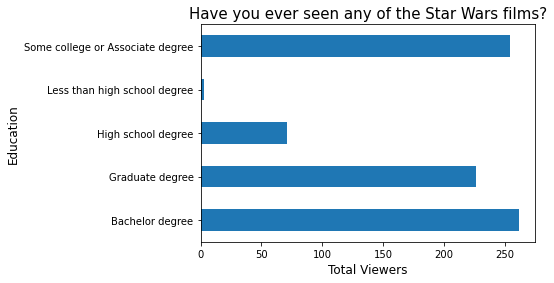

In [38]:
plt.figure(figsize=(8,8))
star_wars_edu.plot.barh(legend = False)
plt.title('Have you ever seen any of the Star Wars films?', fontsize=15)
plt.xlabel('Total Viewers', fontsize=12)
plt.ylabel('Education', fontsize=12)
plt.show()

- It seems like Star Wars Series is not popular among the viewers who have education less than the high school. Only 3 people watched any movie of Star Wars franchise.
- People with High School degrees were also far less interested in watching any movie of Star Wars franchise with just about 71 viewers.
- People with some college or Associate degree, Bachelors Degree, and Graduate Degrees were much more interested with 254, 262 and 226 viewers respectively

##### Lets see how many people who watched the movies actually turned out to be the fans 

In [39]:
star_wars_edu2 = pd.pivot_table(star_wars,index='Education', values='Do you consider yourself to be a fan of the Star Wars film franchise?', 
                          aggfunc=np.sum)
star_wars_edu2

,Do you consider yourself to be a fan of the Star Wars film franchise?
Education,
Bachelor degree,172
Graduate degree,152
High school degree,41
Less than high school degree,3
Some college or Associate degree,171


<Figure size 576x576 with 0 Axes>

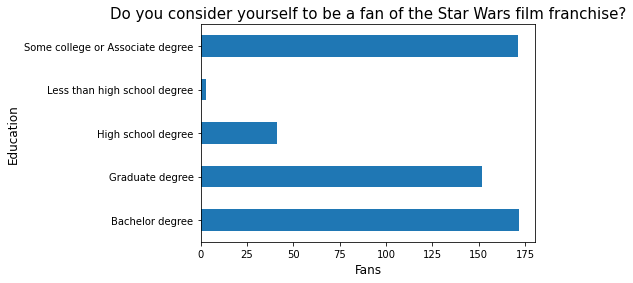

In [40]:
plt.figure(figsize=(8,8))
star_wars_edu2.plot.barh(legend = False)
plt.title('Do you consider yourself to be a fan of the Star Wars film franchise?', fontsize=15)
plt.xlabel('Fans', fontsize=12)
plt.ylabel('Education', fontsize=12)
plt.show()

##### Comparison between Viewers and the ones who became fans (WRT Education)

In [41]:
edu_viewers_vs_fans = pd.concat([star_wars_edu, star_wars_edu2], axis=1)
edu_viewers_vs_fans

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
Education,,
Bachelor degree,262,172
Graduate degree,226,152
High school degree,71,41
Less than high school degree,3,3
Some college or Associate degree,254,171


<Figure size 720x576 with 0 Axes>

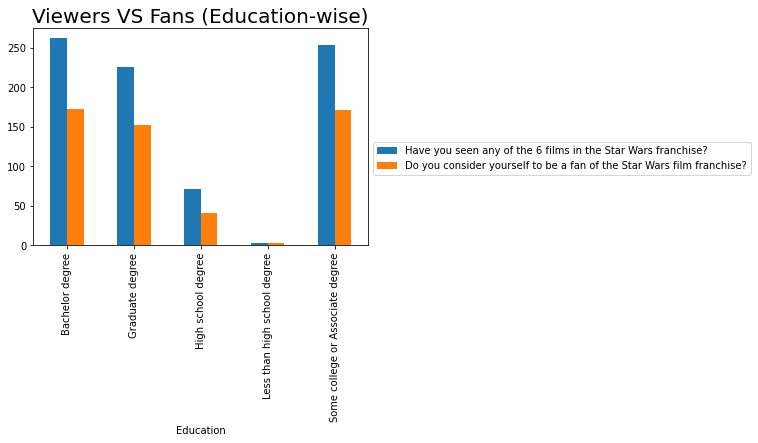

In [42]:
plt.figure(figsize=(10,8))
ax = edu_viewers_vs_fans.plot.bar()
ax.set_title('Viewers VS Fans (Education-wise)', fontsize=20)
ax.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


## Choices made by each of the Age groups:

In [43]:
star_wars.loc[:,'Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [44]:
star_wars_4age = star_wars.copy()
star_wars_4age.loc[:,'Age'].replace('NaN', np.nan, inplace=True)
star_wars_4age.loc[:,'Age'].replace(np.nan, 'Unknown', inplace=True)

In [45]:
star_wars_age = star_wars_4age.groupby('Age')['Have you seen any of the 6 films in the Star Wars franchise?'].sum()

In [46]:
star_wars_age

Age
18-29      180
30-44      207
45-60      240
> 60       193
Unknown    116
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Text(0.5, 1.0, 'Have you seen any of the 6 films in the Star Wars franchise?')

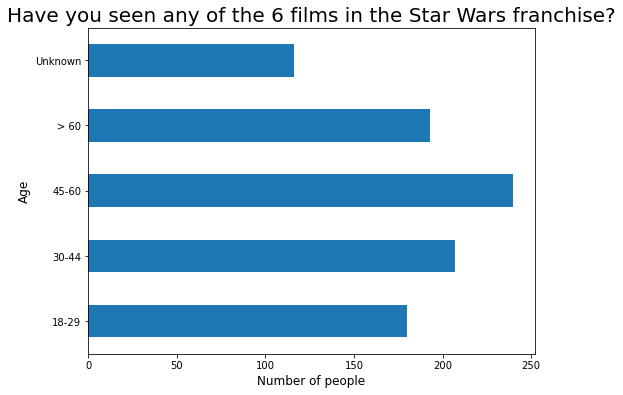

In [47]:
plt.figure(figsize=(8,6))
star_wars_age.plot.barh()
plt.xlabel('Number of people', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Have you seen any of the 6 films in the Star Wars franchise?', fontsize=20)


- It can be seen that Star War episodes were watched by all the age groups

##### Lets see how many people from each age group were fans of Star Wars episodes

In [48]:
star_wars_age2 = star_wars_4age.groupby('Age')['Do you consider yourself to be a fan of the Star Wars film franchise?'].sum()

In [49]:
star_wars_age2

Age
18-29      124
30-44      150
45-60      154
> 60       113
Unknown     11
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Text(0.5, 1.0, 'Do you consider yourself to be a fan of the Star Wars film franchise?')

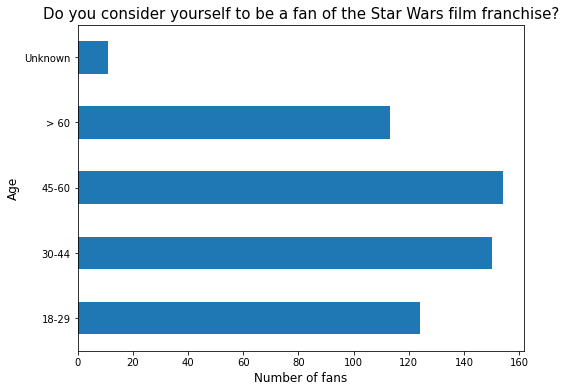

In [50]:
plt.figure(figsize=(8,6))
star_wars_age2.plot.barh()
plt.xlabel('Number of fans', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Do you consider yourself to be a fan of the Star Wars film franchise?', fontsize=15)


- We can see that the number of fans are also mimicing the trends of numbers of viewers from each age category

##### Comparison between Viewers and the ones who became fans (WRT Age)

In [51]:
age_viewers_vs_fans = pd.merge(star_wars_age, star_wars_age2, left_index=True, right_index=True)

<Figure size 720x576 with 0 Axes>

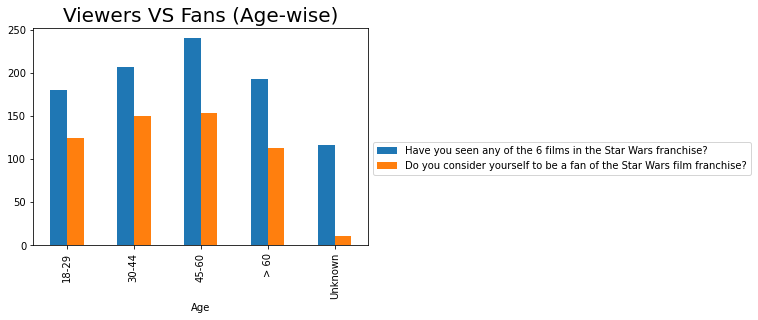

In [52]:
plt.figure(figsize=(10,8))
ax = age_viewers_vs_fans.plot.bar()
ax.set_title('Viewers VS Fans (Age-wise)', fontsize=20)
ax.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


# TBC!!

## Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

In [53]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'ranking_ep1', 'ranking_ep2', 'ranking_ep3', 'ranking_ep4',
       'ranking_ep5', 'ranking_ep6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
    

In [54]:
star_wars['seen_ep5']

1        True
2       False
3       False
4        True
5        True
        ...  
1182     True
1183     True
1184    False
1185     True
1186     True
Name: seen_ep5, Length: 1186, dtype: bool

In [55]:
star_wars1 = star_wars.copy()

<font color='red'> We needed to define bool0 because there seems to be lots of invalid responses. People who earlier said that they have not watched any of the movies later responded positively when asked if they watched ep5

In [56]:

bool0 = star_wars1['Have you seen any of the 6 films in the Star Wars franchise?'] == True
bool1 = star_wars1['seen_ep5'] == True
bool2 = star_wars1['ranking_ep5'] == 1

In [57]:
bool1

1        True
2       False
3       False
4        True
5        True
        ...  
1182     True
1183     True
1184    False
1185     True
1186     True
Name: seen_ep5, Length: 1186, dtype: bool

In [58]:
star_wars1.loc[(bool1 & bool0), :].sum()

RespondentID                                                              758.0
Have you seen any of the 6 films in the Star Wars franchise?              758.0
Do you consider yourself to be a fan of the Star Wars film franchise?     538.0
seen_ep1                                                                  613.0
seen_ep2                                                                  539.0
seen_ep3                                                                  527.0
seen_ep4                                                                  597.0
seen_ep5                                                                  758.0
seen_ep6                                                                  723.0
ranking_ep1                                                              2981.0
ranking_ep2                                                              3227.0
ranking_ep3                                                              3371.0
ranking_ep4                             